# Question4
주제 : Data for Area 에너지 사용량을 예측하는 모델을 만들어 각 area별로 예측정확도를 비교해보자

에너지 사용량을 예측해보자

## 데이터 확인

In [7]:
import pandas as pd
pd.read_csv("./data/UnivClass_Ciara.csv")

,timestamp,UnivClass_Ciara
0,2015-01-01 00:00:00,136.824997
1,2015-01-01 01:00:00,144.025002
2,2015-01-01 02:00:00,144.875000
3,2015-01-01 03:00:00,142.375000
4,2015-01-01 04:00:00,148.199997
...,...,...
8755,2015-12-31 19:00:00,137.749996
8756,2015-12-31 20:00:00,141.424999
8757,2015-12-31 21:00:00,135.174995
8758,2015-12-31 22:00:00,130.424999


In [8]:
meta = pd.read_csv("./data/all_buildings_meta_data.csv")
meta

,uid,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
0,PrimClass_Everett,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,105530.0000,9804.053590,Primary/Secondary School,America/New_York,NaN,Everett,PrimClass,weather12.csv
1,UnivClass_Clifford,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,College Classroom,NaN,56969.0000,5292.591007,College/University,America/New_York,1967,Clifford,UnivClass,weather2.csv
2,Office_Elizabeth,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,294651.0000,27373.961850,Commercial Real Estate,America/Los_Angeles,NaN,Elizabeth,Office,weather22.csv
3,Office_Ellie,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,496517.0000,46127.918850,Bank/Financial Services,America/Los_Angeles,NaN,Ellie,Office,weather28.csv
4,PrimClass_Elisabeth,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,233062.0000,21652.158990,Primary/Secondary School,America/New_York,NaN,Elisabeth,PrimClass,weather23.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Office_Lane,30/11/15 23:00,01/12/14 00:00,NaN,Heat network,Education,Heat Network,8.0,NaN,Office,NaN,34455.2439,3201.000000,College/University,Europe/London,1907,Lane,Office,weather5.csv
503,Office_Cameron,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,53303.0000,4952.008609,College/University,America/New_York,1981,Cameron,Office,weather2.csv
504,UnivLab_Lea,30/11/15 23:00,01/12/14 00:00,NaN,Gas,Education,Gas,6.0,NaN,College Laboratory,NaN,16802.4479,1561.000000,College/University,Europe/London,1995,Lea,UnivLab,weather5.csv
505,UnivLab_Carlos,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,College Laboratory,NaN,30143.0000,2800.375129,College/University,America/New_York,1951,Carlos,UnivLab,weather2.csv


In [9]:
meta[meta["uid"] == "PrimClass_Esmeralda"]

,uid,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
9,PrimClass_Esmeralda,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,276443.0,25682.38403,Primary/Secondary School,America/New_York,NaN,Esmeralda,PrimClass,weather17.csv


In [10]:
meta[meta["newweatherfilename"] == "weather2.csv"]

,uid,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
1,UnivClass_Clifford,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,College Classroom,NaN,56969.0,5292.591007,College/University,America/New_York,1967,Clifford,UnivClass,weather2.csv
5,Office_Cristina,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,92271.0,8572.252713,College/University,America/New_York,2001,Cristina,Office,weather2.csv
50,UnivDorm_Claudia,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,Dormitory,NaN,96336.0,8949.903408,College/University,America/New_York,1913,Claudia,UnivDorm,weather2.csv
60,UnivDorm_Carla,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,Dormitory,NaN,40629.0,3774.555987,College/University,America/New_York,1975,Carla,UnivDorm,weather2.csv
61,UnivClass_Camden,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,College Classroom,NaN,31415.0,2918.547745,College/University,America/New_York,1912,Camden,UnivClass,weather2.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,UnivLab_Carley,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,College Laboratory,NaN,56497.0,5248.740791,College/University,America/New_York,1957,Carley,UnivLab,weather2.csv
495,UnivLab_Carole,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,College Laboratory,NaN,149762.0,13913.339090,College/University,America/New_York,2004,Carole,UnivLab,weather2.csv
499,UnivDorm_Cecilia,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,Dormitory,NaN,29775.0,2766.186825,College/University,America/New_York,2001,Cecilia,UnivDorm,weather2.csv
503,Office_Cameron,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,53303.0,4952.008609,College/University,America/New_York,1981,Cameron,Office,weather2.csv


UnivClass_Ciara, UnivLab_Cesar 는 weather2 데이터 사용
weather2 데이터로 학습 모델을 만들어서 UnivClass_Ciara, UniveLab_Cesar 의 예측 정확도를 비교해보

In [11]:
pd.read_csv("./data/weather4.csv")

,timestamp,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,TimeEDT,TimeEST,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1
0,2015-01-01 00:53:00,Clear,2015-01-01 05:53:00<br />,-12.2,NaN,-,58.0,NaN,1021.4,-5.0,NaN,12:53 AM,14.5,SW,7.4,230,2015-01-01 00:53:00
1,2015-01-01 01:53:00,Clear,2015-01-01 06:53:00<br />,-13.3,NaN,-,49.0,NaN,1021.2,-3.9,NaN,1:53 AM,16.1,West,11.1,260,2015-01-01 01:53:00
2,2015-01-01 02:53:00,Clear,2015-01-01 07:53:00<br />,-13.9,NaN,-,46.0,NaN,1020.9,-3.9,NaN,2:53 AM,16.1,SW,9.3,230,2015-01-01 02:53:00
3,2015-01-01 03:53:00,Clear,2015-01-01 08:53:00<br />,-13.9,NaN,-,44.0,NaN,1020.5,-3.3,NaN,3:53 AM,16.1,WSW,13.0,250,2015-01-01 03:53:00
4,2015-01-01 04:53:00,Clear,2015-01-01 09:53:00<br />,-13.9,NaN,-,44.0,NaN,1020.4,-3.3,NaN,4:53 AM,16.1,WSW,9.3,240,2015-01-01 04:53:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11129,2015-12-31 21:53:00,Overcast,2016-01-01 02:53:00<br />,-1.1,NaN,-,62.0,NaN,1019.4,5.6,NaN,9:53 PM,16.1,Variable,5.6,0,2015-12-31 21:53:00
11130,2015-12-31 22:29:00,Overcast,2016-01-01 03:29:00<br />,-1.7,NaN,-,60.0,NaN,1019.5,5.6,NaN,10:29 PM,16.1,WNW,9.3,300,2015-12-31 22:29:00
11131,2015-12-31 22:40:00,Overcast,2016-01-01 03:40:00<br />,-2.2,NaN,-,58.0,NaN,1019.5,5.6,NaN,10:40 PM,16.1,WNW,7.4,290,2015-12-31 22:40:00
11132,2015-12-31 22:53:00,Overcast,2016-01-01 03:53:00<br />,-2.2,NaN,-,60.0,NaN,1019.2,5.0,NaN,10:53 PM,16.1,WNW,11.1,290,2015-12-31 22:53:00


## 데이터 처리

In [12]:
weather = pd.read_csv("./data/weather2.csv")
weather

,timestamp,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,TimeEDT,TimeEST,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1
0,2015-01-01 00:56:00,Overcast,2015-01-01 05:56:00<br />,-15.0,NaN,-,54.0,NaN,1017.4,-7.2,NaN,12:56 AM,16.1,SW,18.5,230,2015-01-01 00:56:00
1,2015-01-01 01:56:00,Overcast,2015-01-01 06:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,NaN,1:56 AM,16.1,WSW,14.8,240,2015-01-01 01:56:00
2,2015-01-01 02:56:00,Overcast,2015-01-01 07:56:00<br />,-14.4,NaN,-,55.0,NaN,1016.9,-6.6,NaN,2:56 AM,16.1,SW,14.8,220,2015-01-01 02:56:00
3,2015-01-01 03:56:00,Overcast,2015-01-01 08:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,NaN,3:56 AM,16.1,SW,18.5,220,2015-01-01 03:56:00
4,2015-01-01 04:56:00,Overcast,2015-01-01 09:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,NaN,4:56 AM,16.1,SSW,14.8,210,2015-01-01 04:56:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10909,2015-12-31 17:56:00,Light Snow,2015-12-31 22:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,NaN,5:56 PM,16.1,NNW,9.3,330,2015-12-31 17:56:00
10910,2015-12-31 18:56:00,Light Snow,2015-12-31 23:56:00<br />,-2.0,Snow,-,93.0,NaN,1019.2,-1.0,NaN,6:56 PM,8.0,NNW,13.0,330,2015-12-31 18:56:00
10911,2015-12-31 19:56:00,Light Snow,2016-01-01 00:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.5,-1.0,NaN,7:56 PM,6.4,NNW,14.8,330,2015-12-31 19:56:00
10912,2015-12-31 20:56:00,Light Snow,2016-01-01 01:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,NaN,8:56 PM,6.4,NNW,9.3,330,2015-12-31 20:56:00


In [13]:
ciara = pd.read_csv("./data/UnivClass_Ciara.csv")
ciara

,timestamp,UnivClass_Ciara
0,2015-01-01 00:00:00,136.824997
1,2015-01-01 01:00:00,144.025002
2,2015-01-01 02:00:00,144.875000
3,2015-01-01 03:00:00,142.375000
4,2015-01-01 04:00:00,148.199997
...,...,...
8755,2015-12-31 19:00:00,137.749996
8756,2015-12-31 20:00:00,141.424999
8757,2015-12-31 21:00:00,135.174995
8758,2015-12-31 22:00:00,130.424999


In [14]:
cesar = pd.read_csv("./data/UnivLab_Cesar.csv")
cesar

,timestamp,UnivLab_Cesar
0,2015-01-01 00:00:00,5.025
1,2015-01-01 01:00:00,4.600
2,2015-01-01 02:00:00,4.750
3,2015-01-01 03:00:00,4.700
4,2015-01-01 04:00:00,4.575
...,...,...
8755,2015-12-31 19:00:00,5.925
8756,2015-12-31 20:00:00,6.850
8757,2015-12-31 21:00:00,6.500
8758,2015-12-31 22:00:00,6.500


weather 데이터와 측정된 에너지 데이터를 통합해야하는데 weather 데이터를 보면 56분에 측정되어 있고 energy데이터는 각 시각 정각에 측정되어 있음.
두 데이터를 시간단위로 통합하기위해 시간단위로 처리하기.(같은 시간에 두번 측정된 데이터는 뒤에 측정된 시간만 남기고 삭제)


In [15]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10914 entries, 0 to 10913
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              10914 non-null  object 
 1   Conditions             10914 non-null  object 
 2   DateUTC<br />          10914 non-null  object 
 3   Dew PointC             10914 non-null  float64
 4   Events                 2555 non-null   object 
 5   Gust SpeedKm/h         10914 non-null  object 
 6   Humidity               10878 non-null  float64
 7   Precipitationmm        2945 non-null   float64
 8   Sea Level PressurehPa  10914 non-null  float64
 9   TemperatureC           10914 non-null  float64
 10  TimeEDT                7104 non-null   object 
 11  TimeEST                3810 non-null   object 
 12  VisibilityKm           10914 non-null  float64
 13  Wind Direction         10914 non-null  object 
 14  Wind SpeedKm/h         10914 non-null  object 
 15  Wi

In [16]:
def make_date(df, col_name):
    df[col_name] = pd.to_datetime(df[col_name], format='%Y-%m-%d %H:%M:%S', errors='coerce')

    dt = pd.DatetimeIndex(df[col_name])
    df["date"] = dt.date
    df["year"] = dt.year
    df["month"] = dt.month
    df["day"] = dt.day
    df["hour"] = dt.hour
    df["dayofweek"] = dt.dayofweek

In [17]:
make_date(weather, "timestamp")

In [18]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10914 entries, 0 to 10913
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              10914 non-null  datetime64[ns]
 1   Conditions             10914 non-null  object        
 2   DateUTC<br />          10914 non-null  object        
 3   Dew PointC             10914 non-null  float64       
 4   Events                 2555 non-null   object        
 5   Gust SpeedKm/h         10914 non-null  object        
 6   Humidity               10878 non-null  float64       
 7   Precipitationmm        2945 non-null   float64       
 8   Sea Level PressurehPa  10914 non-null  float64       
 9   TemperatureC           10914 non-null  float64       
 10  TimeEDT                7104 non-null   object        
 11  TimeEST                3810 non-null   object        
 12  VisibilityKm           10914 non-null  float64       
 13  W

In [19]:
# 중복 제거
weather = weather.drop_duplicates(["date", "hour"], keep="last")
# 확인
weather[weather.duplicated(["date", "hour"], keep=False)]

,timestamp,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,...,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1,date,year,month,day,hour,dayofweek


에너지 데이터를 weather 데이터와 합치기위해 날짜와 시간 컬럼을 만들어주자

In [20]:
def make_energy_date(dataframe):
    dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
    dt = pd.DatetimeIndex(dataframe["timestamp"])
    dataframe["date"] = dt.date
    dataframe["hour"] = dt.hour

In [21]:
make_energy_date(ciara)
ciara = ciara.drop("timestamp", axis=1)
ciara

,UnivClass_Ciara,date,hour
0,136.824997,2015-01-01,0
1,144.025002,2015-01-01,1
2,144.875000,2015-01-01,2
3,142.375000,2015-01-01,3
4,148.199997,2015-01-01,4
...,...,...,...
8755,137.749996,2015-12-31,19
8756,141.424999,2015-12-31,20
8757,135.174995,2015-12-31,21
8758,130.424999,2015-12-31,22


In [22]:
make_energy_date(cesar)
cesar = cesar.drop("timestamp", axis=1)
cesar

,UnivLab_Cesar,date,hour
0,5.025,2015-01-01,0
1,4.600,2015-01-01,1
2,4.750,2015-01-01,2
3,4.700,2015-01-01,3
4,4.575,2015-01-01,4
...,...,...,...
8755,5.925,2015-12-31,19
8756,6.850,2015-12-31,20
8757,6.500,2015-12-31,21
8758,6.500,2015-12-31,22


In [23]:
# 혹시모를 중복 확인
def check_dup(dataframe):
    return dataframe[dataframe.duplicated(["date", "hour"], keep=False)]

In [24]:
check_dup(ciara)

,UnivClass_Ciara,date,hour
7296,138.950005,2015-11-01,1
7297,138.950005,2015-11-01,1


In [25]:
ciara = ciara.drop_duplicates(["date", "hour"], keep="last")
check_dup(ciara)

,UnivClass_Ciara,date,hour


In [26]:
check_dup(cesar)

,UnivLab_Cesar,date,hour
7296,4.75,2015-11-01,1
7297,4.75,2015-11-01,1


In [27]:
cesar = cesar.drop_duplicates(["date", "hour"], keep="last")
check_dup(cesar)

,UnivLab_Cesar,date,hour


데이터 결합(weather + date)

In [28]:
df = pd.merge(weather, ciara, how="inner", on=["date", "hour"])
df = pd.merge(df, cesar, how="inner", on=["date", "hour"])
df

,timestamp,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,...,WindDirDegrees,timestamp.1,date,year,month,day,hour,dayofweek,UnivClass_Ciara,UnivLab_Cesar
0,2015-01-01 00:56:00,Overcast,2015-01-01 05:56:00<br />,-15.0,NaN,-,54.0,NaN,1017.4,-7.2,...,230,2015-01-01 00:56:00,2015-01-01,2015,1,1,0,3,136.824997,5.025
1,2015-01-01 01:56:00,Overcast,2015-01-01 06:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,...,240,2015-01-01 01:56:00,2015-01-01,2015,1,1,1,3,144.025002,4.600
2,2015-01-01 02:56:00,Overcast,2015-01-01 07:56:00<br />,-14.4,NaN,-,55.0,NaN,1016.9,-6.6,...,220,2015-01-01 02:56:00,2015-01-01,2015,1,1,2,3,144.875000,4.750
3,2015-01-01 03:56:00,Overcast,2015-01-01 08:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,...,220,2015-01-01 03:56:00,2015-01-01,2015,1,1,3,3,142.375000,4.700
4,2015-01-01 04:56:00,Overcast,2015-01-01 09:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,...,210,2015-01-01 04:56:00,2015-01-01,2015,1,1,4,3,148.199997,4.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8562,2015-12-31 17:56:00,Light Snow,2015-12-31 22:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,...,330,2015-12-31 17:56:00,2015-12-31,2015,12,31,17,3,139.075001,7.850
8563,2015-12-31 18:56:00,Light Snow,2015-12-31 23:56:00<br />,-2.0,Snow,-,93.0,NaN,1019.2,-1.0,...,330,2015-12-31 18:56:00,2015-12-31,2015,12,31,18,3,138.224998,7.550
8564,2015-12-31 19:56:00,Light Snow,2016-01-01 00:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.5,-1.0,...,330,2015-12-31 19:56:00,2015-12-31,2015,12,31,19,3,137.749996,5.925
8565,2015-12-31 20:56:00,Light Snow,2016-01-01 01:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,...,330,2015-12-31 20:56:00,2015-12-31,2015,12,31,20,3,141.424999,6.850


필요없는 컬럼 제거

In [29]:
drop_cols = ['timestamp', 'DateUTC<br />', 'timestamp.1', 'TimeEDT', 'TimeEST']

df = df.drop(drop_cols, axis=1)
df

,Conditions,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,date,year,month,day,hour,dayofweek,UnivClass_Ciara,UnivLab_Cesar
0,Overcast,-15.0,NaN,-,54.0,NaN,1017.4,-7.2,16.1,SW,18.5,230,2015-01-01,2015,1,1,0,3,136.824997,5.025
1,Overcast,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,16.1,WSW,14.8,240,2015-01-01,2015,1,1,1,3,144.025002,4.600
2,Overcast,-14.4,NaN,-,55.0,NaN,1016.9,-6.6,16.1,SW,14.8,220,2015-01-01,2015,1,1,2,3,144.875000,4.750
3,Overcast,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,16.1,SW,18.5,220,2015-01-01,2015,1,1,3,3,142.375000,4.700
4,Overcast,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,16.1,SSW,14.8,210,2015-01-01,2015,1,1,4,3,148.199997,4.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8562,Light Snow,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,16.1,NNW,9.3,330,2015-12-31,2015,12,31,17,3,139.075001,7.850
8563,Light Snow,-2.0,Snow,-,93.0,NaN,1019.2,-1.0,8.0,NNW,13.0,330,2015-12-31,2015,12,31,18,3,138.224998,7.550
8564,Light Snow,-1.0,Snow,-,100.0,NaN,1019.5,-1.0,6.4,NNW,14.8,330,2015-12-31,2015,12,31,19,3,137.749996,5.925
8565,Light Snow,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,6.4,NNW,9.3,330,2015-12-31,2015,12,31,20,3,141.424999,6.850


## 결측치 보완

결측치 확인 -> 결측치가 있으면 머신러닝이 않됨!!

<AxesSubplot:>

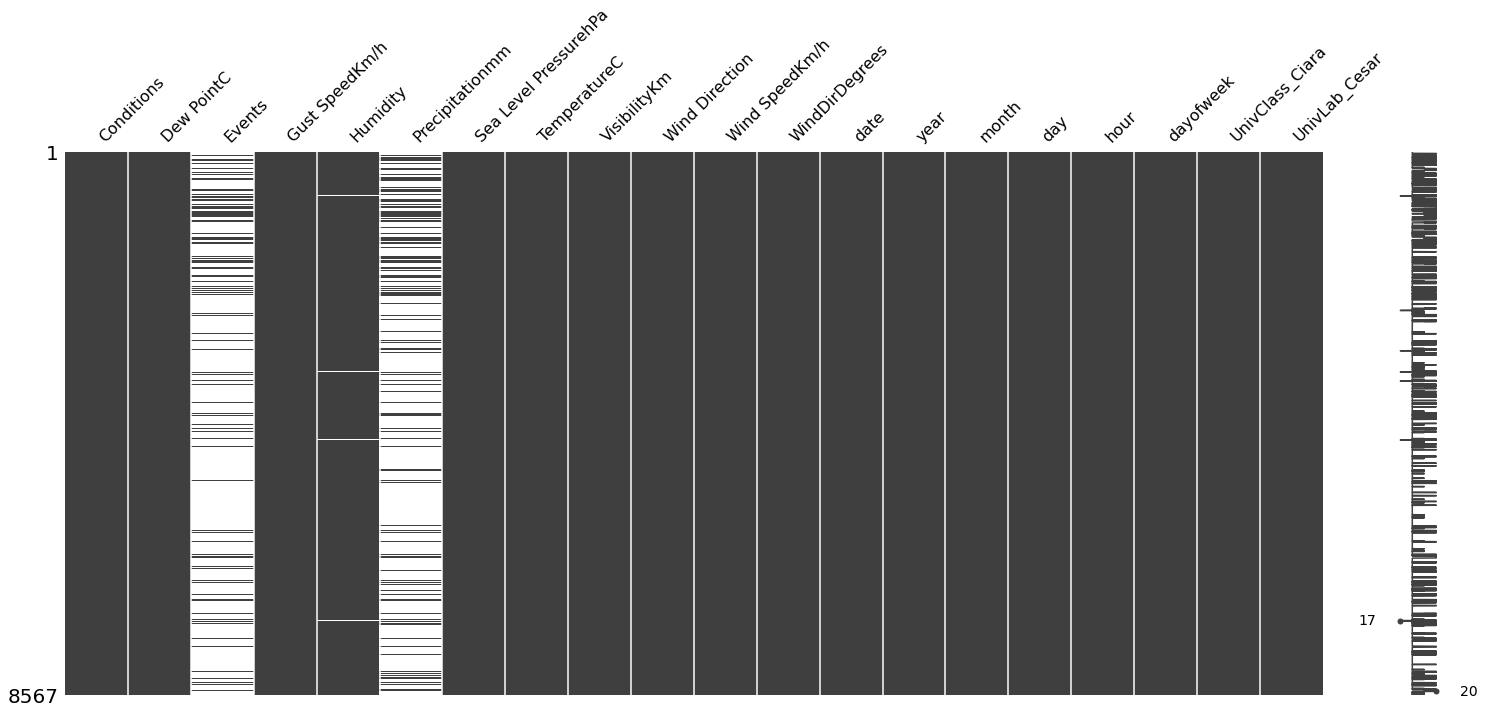

In [30]:
import missingno
missingno.matrix(df)

In [31]:
df.isnull().sum()

Conditions                  0
Dew PointC                  0
Events                   7146
Gust SpeedKm/h              0
Humidity                   11
Precipitationmm          6696
Sea Level PressurehPa       0
TemperatureC                0
VisibilityKm                0
Wind Direction              0
Wind SpeedKm/h              0
WindDirDegrees              0
date                        0
year                        0
month                       0
day                         0
hour                        0
dayofweek                   0
UnivClass_Ciara             0
UnivLab_Cesar               0
dtype: int64

일단 Events 컬럼이 멀 나타내는지 확인

In [32]:
df["Events"].unique()

array([nan, 'Snow', 'Rain', 'Fog', 'Fog-Snow', 'Fog-Rain', 'Rain-Snow',
       'Rain-Thunderstorm', 'Thunderstorm'], dtype=object)

Events는 날씨를 나타냄. Nan은 맑음을 나타낸 것으로 보임
결측치를 Sunny로 채워보자

In [33]:
df["Events"] = df["Events"].fillna("Sunny")
df["Events"].isnull().sum()

0

Humidity 결측치 값을 확인해보자

In [34]:
df[df["Humidity"].isnull()]

,Conditions,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,date,year,month,day,hour,dayofweek,UnivClass_Ciara,UnivLab_Cesar
700,Overcast,-9999.0,Sunny,-,NaN,NaN,1017.5,-9999.0,4.8,NW,31.5,320,2015-01-30,2015,1,30,14,4,208.949997,7.300
731,Light Snow,-9999.0,Snow,-,NaN,NaN,1001.9,-12.0,1.2,WNW,31.5,300,2015-02-02,2015,2,2,13,0,202.774994,7.125
2501,Clear,-9999.0,Sunny,-,NaN,NaN,1023.6,-9999.0,16.1,Calm,Calm,0,2015-04-19,2015,4,19,6,6,142.974998,5.425
2558,Light Rain,-9999.0,Rain,-,NaN,NaN,1003.3,-9999.0,16.1,NW,9.3,320,2015-04-22,2015,4,22,18,2,171.625000,5.700
3136,Unknown,-9999.0,Sunny,-,NaN,NaN,-9999.0,-9999.0,-9999.0,Calm,Calm,0,2015-05-17,2015,5,17,4,6,148.250000,5.800
3472,Unknown,-9999.0,Sunny,-,NaN,NaN,-9999.0,-9999.0,-9999.0,WNW,29.6,300,2015-05-31,2015,5,31,4,6,151.324997,5.350
3613,Unknown,-9999.0,Sunny,-,NaN,NaN,-9999.0,-9999.0,-9999.0,NW,5.6,320,2015-06-06,2015,6,6,1,5,138.349998,5.375
4543,Unknown,-9999.0,Sunny,-,NaN,NaN,-9999.0,-9999.0,-9999.0,NNW,11.1,330,2015-07-15,2015,7,15,4,2,161.449997,6.525
7389,Unknown,-9999.0,Sunny,-,NaN,NaN,-9999.0,-9999.0,-9999.0,NW,9.3,320,2015-11-11,2015,11,11,0,2,147.775002,7.400
7390,Unknown,-9999.0,Sunny,-,NaN,NaN,-9999.0,-9999.0,-9999.0,NW,9.3,310,2015-11-11,2015,11,11,1,2,139.224998,5.350


Humidity 가 없는 값은 Dew Point와 Temperature 모두 -9999로 이상치 값으로 아마 잘 못 측정되었을 것이라 생각
이런 데이터는 머신러닝 성능에 좋지 않은 영향을 줄 것으로 판단해 삭제

In [35]:
drop_idx = df[df["Humidity"].isnull()].index
df = df.drop(drop_idx, axis=0)

In [36]:
df["Humidity"].isnull().sum()

0

Precipitationmm 은 강수량 -> 강수량은 비와 눈 우박에 영향을 받을 것으로 생각

In [37]:
df[df["Precipitationmm"].isnull()]

,Conditions,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,date,year,month,day,hour,dayofweek,UnivClass_Ciara,UnivLab_Cesar
0,Overcast,-15.0,Sunny,-,54.0,NaN,1017.4,-7.2,16.1,SW,18.5,230,2015-01-01,2015,1,1,0,3,136.824997,5.025
1,Overcast,-14.4,Sunny,-,55.0,NaN,1017.2,-6.6,16.1,WSW,14.8,240,2015-01-01,2015,1,1,1,3,144.025002,4.600
2,Overcast,-14.4,Sunny,-,55.0,NaN,1016.9,-6.6,16.1,SW,14.8,220,2015-01-01,2015,1,1,2,3,144.875000,4.750
3,Overcast,-14.4,Sunny,-,55.0,NaN,1017.2,-6.6,16.1,SW,18.5,220,2015-01-01,2015,1,1,3,3,142.375000,4.700
4,Overcast,-14.4,Sunny,-,55.0,NaN,1017.2,-6.6,16.1,SSW,14.8,210,2015-01-01,2015,1,1,4,3,148.199997,4.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8562,Light Snow,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,16.1,NNW,9.3,330,2015-12-31,2015,12,31,17,3,139.075001,7.850
8563,Light Snow,-2.0,Snow,-,93.0,NaN,1019.2,-1.0,8.0,NNW,13.0,330,2015-12-31,2015,12,31,18,3,138.224998,7.550
8564,Light Snow,-1.0,Snow,-,100.0,NaN,1019.5,-1.0,6.4,NNW,14.8,330,2015-12-31,2015,12,31,19,3,137.749996,5.925
8565,Light Snow,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,6.4,NNW,9.3,330,2015-12-31,2015,12,31,20,3,141.424999,6.850


In [38]:
df.loc[df["Events"] == "Sunny", "Precipitationmm"].unique()

array([ nan, 0.  , 0.03, 0.02, 0.08, 0.01, 0.57, 0.1 , 0.48, 0.04, 0.16,
       0.06, 0.12, 0.46, 0.35, 0.2 , 0.36, 0.05, 0.09, 0.18, 0.22])

In [39]:
df["Precipitationmm"].unique()

array([ nan, 0.  , 0.02, 0.03, 0.06, 0.1 , 0.12, 0.08, 0.01, 0.04, 0.05,
       0.13, 0.14, 0.09, 0.07, 0.26, 0.32, 0.23, 0.15, 0.19, 0.27, 0.22,
       0.57, 0.11, 0.24, 1.43, 0.28, 0.91, 0.2 , 0.16, 0.48, 0.21, 0.34,
       0.18, 0.46, 0.35, 0.63, 1.38, 0.82, 0.41, 0.3 , 0.36, 0.17, 0.37,
       0.39, 0.38])

위에 부분을 보니 맑은 날이라고해서 무조건 강수량이 0인 것은 아님
강수량과 관련있는 파라미터 확인

<AxesSubplot:>

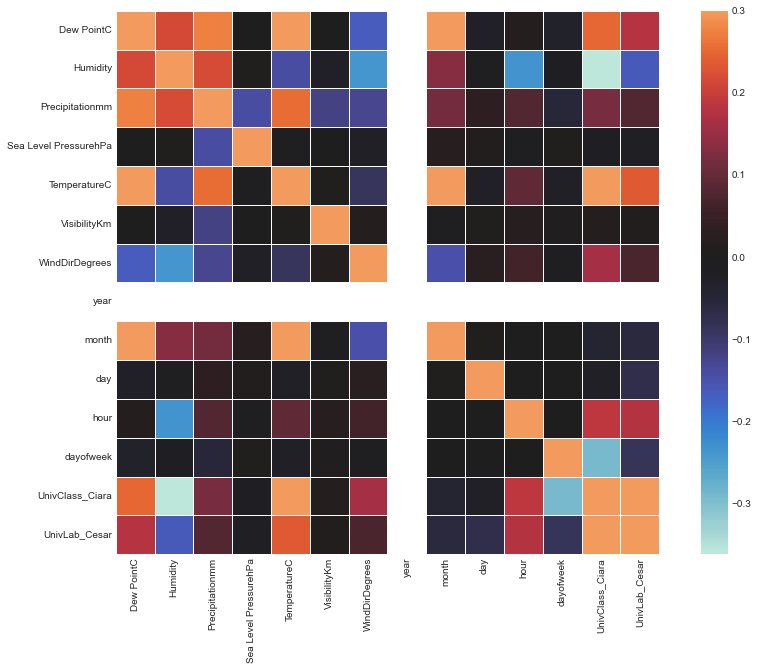

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(["seaborn-white"])

plt.figure(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5)

Dew PointC 가장 많은영향을 주는 듯
Dew Point 와 강수량 시각화

<Figure size 1440x720 with 0 Axes>

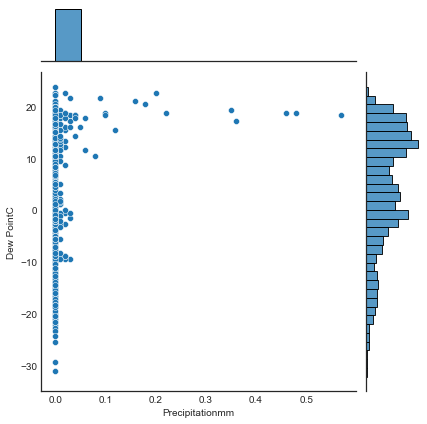

In [41]:
plt.figure(figsize=(20, 10))
sns.jointplot(data=df.query("Events == 'Sunny'"), x="Precipitationmm", y="Dew PointC")

DewPoint가 10 ~ 20 사이의 값의 일부 데이터의 강수량이 값의 차이가 있음.
성능 향상을 위해서는 이 부분도 처리를 확실하게 해야하지만 이번 경우에는 Sunny는 0.0으로 처리하고 나머지는 중앙값으로 처리

In [42]:
df[df["Precipitationmm"].isnull()]

,Conditions,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,date,year,month,day,hour,dayofweek,UnivClass_Ciara,UnivLab_Cesar
0,Overcast,-15.0,Sunny,-,54.0,NaN,1017.4,-7.2,16.1,SW,18.5,230,2015-01-01,2015,1,1,0,3,136.824997,5.025
1,Overcast,-14.4,Sunny,-,55.0,NaN,1017.2,-6.6,16.1,WSW,14.8,240,2015-01-01,2015,1,1,1,3,144.025002,4.600
2,Overcast,-14.4,Sunny,-,55.0,NaN,1016.9,-6.6,16.1,SW,14.8,220,2015-01-01,2015,1,1,2,3,144.875000,4.750
3,Overcast,-14.4,Sunny,-,55.0,NaN,1017.2,-6.6,16.1,SW,18.5,220,2015-01-01,2015,1,1,3,3,142.375000,4.700
4,Overcast,-14.4,Sunny,-,55.0,NaN,1017.2,-6.6,16.1,SSW,14.8,210,2015-01-01,2015,1,1,4,3,148.199997,4.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8562,Light Snow,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,16.1,NNW,9.3,330,2015-12-31,2015,12,31,17,3,139.075001,7.850
8563,Light Snow,-2.0,Snow,-,93.0,NaN,1019.2,-1.0,8.0,NNW,13.0,330,2015-12-31,2015,12,31,18,3,138.224998,7.550
8564,Light Snow,-1.0,Snow,-,100.0,NaN,1019.5,-1.0,6.4,NNW,14.8,330,2015-12-31,2015,12,31,19,3,137.749996,5.925
8565,Light Snow,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,6.4,NNW,9.3,330,2015-12-31,2015,12,31,20,3,141.424999,6.850


In [43]:
df[df["Events"] == "Snow"]["Precipitationmm"].median()

0.0

In [44]:
df[df["Events"] == "Fog"]["Precipitationmm"].median()

0.0

In [45]:
df[df["Events"] == "Thunderstorm"]

,Conditions,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,date,year,month,day,hour,dayofweek,UnivClass_Ciara,UnivLab_Cesar
3467,Thunderstorm,18.3,Thunderstorm,-,93.0,NaN,1016.3,19.4,16.1,Calm,Calm,0,2015-05-30,2015,5,30,23,5,159.625000,6.425
3610,Overcast,16.1,Thunderstorm,-,90.0,NaN,1014.4,17.7,16.1,WNW,18.5,300,2015-06-05,2015,6,5,22,4,152.250000,7.025
3673,Thunderstorm,17.0,Thunderstorm,61.1,69.0,NaN,1008.7,23.0,16.1,NW,44.4,310,2015-06-08,2015,6,8,13,0,202.650002,6.975
3774,Thunderstorm,18.8,Thunderstorm,57.4,68.0,NaN,1010.3,25.0,16.1,NNW,38.9,340,2015-06-12,2015,6,12,18,4,197.300003,9.050
4616,Scattered Clouds,18.8,Thunderstorm,-,87.0,NaN,1012.4,21.1,16.1,South,14.8,190,2015-07-18,2015,7,18,5,5,158.399994,6.150
4661,Clear,20.5,Thunderstorm,-,87.0,NaN,1007.8,22.7,16.1,Calm,Calm,0,2015-07-20,2015,7,20,2,0,187.525002,8.450
5013,Thunderstorm,16.6,Thunderstorm,-,70.0,NaN,1008.0,22.2,16.1,Calm,Calm,0,2015-08-03,2015,8,3,18,0,198.050003,6.775


In [46]:
df[df["Events"] == "Rain"]["Precipitationmm"].median()

0.01

Rain의 중앙값은 0.1, 나머지는 0
Thunderstorm의 경우 nan 측정되지 않았음 -> 일단은 0으로 처리

In [47]:
df.loc[(df["Precipitationmm"].isnull()) & (df["Events"] == "Rain"), "Precipitationmm"] = 0.1
df["Precipitationmm"] = df["Precipitationmm"].fillna(0.0)
df["Precipitationmm"].isnull().sum()

0

Gust Speed 의 경우 강풍을 의미하는데 강풍이 측정되지 않은 경우 "-"를 0으로 변경

In [48]:
df.loc[df["Gust SpeedKm/h"] == "-", "Gust SpeedKm/h"] = 0

In [49]:
df[df["Gust SpeedKm/h"] == "-"]

,Conditions,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,date,year,month,day,hour,dayofweek,UnivClass_Ciara,UnivLab_Cesar


In [50]:
df["Gust SpeedKm/h"] = df["Gust SpeedKm/h"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8556 entries, 0 to 8566
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Conditions             8556 non-null   object 
 1   Dew PointC             8556 non-null   float64
 2   Events                 8556 non-null   object 
 3   Gust SpeedKm/h         8556 non-null   float64
 4   Humidity               8556 non-null   float64
 5   Precipitationmm        8556 non-null   float64
 6   Sea Level PressurehPa  8556 non-null   float64
 7   TemperatureC           8556 non-null   float64
 8   VisibilityKm           8556 non-null   float64
 9   Wind Direction         8556 non-null   object 
 10  Wind SpeedKm/h         8556 non-null   object 
 11  WindDirDegrees         8556 non-null   int64  
 12  date                   8556 non-null   object 
 13  year                   8556 non-null   int64  
 14  month                  8556 non-null   int64  
 15  day 

In [51]:
df.isnull().sum()

Conditions               0
Dew PointC               0
Events                   0
Gust SpeedKm/h           0
Humidity                 0
Precipitationmm          0
Sea Level PressurehPa    0
TemperatureC             0
VisibilityKm             0
Wind Direction           0
Wind SpeedKm/h           0
WindDirDegrees           0
date                     0
year                     0
month                    0
day                      0
hour                     0
dayofweek                0
UnivClass_Ciara          0
UnivLab_Cesar            0
dtype: int64

결측치 없이 깔끔하게 처리된 거 확인

<AxesSubplot:>

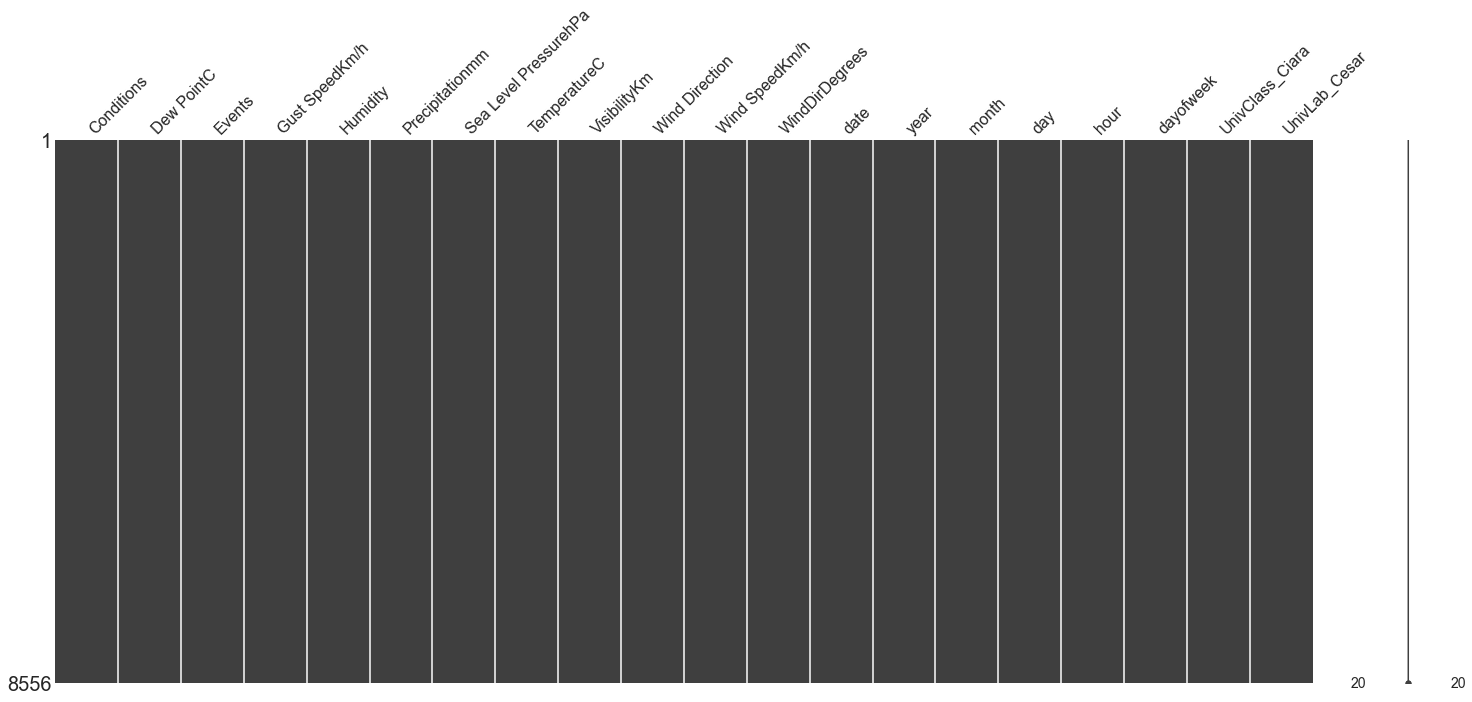

In [52]:
missingno.matrix(df)

각 데이터 마다 이상치 있는지 확인

In [53]:
drop_idx = df[df["Sea Level PressurehPa"] == -9999].index
df = df.drop(drop_idx, axis=0)

In [54]:
drop_idx = df[df["VisibilityKm"] == -9999].index
df = df.drop(drop_idx, axis=0)

In [55]:
# wind speed는 object 타입이라 str로 제거하고 float 타입으로 변환
drop_idx = df[df["Wind SpeedKm/h"] == "-9999.0"].index
df = df.drop(drop_idx, axis=0)

일반적으로 wind speed가 1knot(1km/h) 이하 풍속으로 불 대 calm으로 표시 calm을 0.5로 변경

In [56]:
df.loc[df["Wind SpeedKm/h"] == "Calm", "Wind SpeedKm/h"] = 0.5
df["Wind SpeedKm/h"].unique()

array(['18.5', '14.8', '16.7', '22.2', '20.4', '25.9', '24.1', '27.8',
       '13.0', '7.4', '5.6', 0.5, '9.3', '33.3', '31.5', '35.2', '44.4',
       '37.0', '29.6', '38.9', '48.2', '11.1', '40.7', '42.6'],
      dtype=object)

In [57]:
df["Wind SpeedKm/h"] = df["Wind SpeedKm/h"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8541 entries, 0 to 8566
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Conditions             8541 non-null   object 
 1   Dew PointC             8541 non-null   float64
 2   Events                 8541 non-null   object 
 3   Gust SpeedKm/h         8541 non-null   float64
 4   Humidity               8541 non-null   float64
 5   Precipitationmm        8541 non-null   float64
 6   Sea Level PressurehPa  8541 non-null   float64
 7   TemperatureC           8541 non-null   float64
 8   VisibilityKm           8541 non-null   float64
 9   Wind Direction         8541 non-null   object 
 10  Wind SpeedKm/h         8541 non-null   float64
 11  WindDirDegrees         8541 non-null   int64  
 12  date                   8541 non-null   object 
 13  year                   8541 non-null   int64  
 14  month                  8541 non-null   int64  
 15  day 

사용안하는 컬럼 제거

In [58]:
df

,Conditions,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,date,year,month,day,hour,dayofweek,UnivClass_Ciara,UnivLab_Cesar
0,Overcast,-15.0,Sunny,0.0,54.0,0.0,1017.4,-7.2,16.1,SW,18.5,230,2015-01-01,2015,1,1,0,3,136.824997,5.025
1,Overcast,-14.4,Sunny,0.0,55.0,0.0,1017.2,-6.6,16.1,WSW,14.8,240,2015-01-01,2015,1,1,1,3,144.025002,4.600
2,Overcast,-14.4,Sunny,0.0,55.0,0.0,1016.9,-6.6,16.1,SW,14.8,220,2015-01-01,2015,1,1,2,3,144.875000,4.750
3,Overcast,-14.4,Sunny,0.0,55.0,0.0,1017.2,-6.6,16.1,SW,18.5,220,2015-01-01,2015,1,1,3,3,142.375000,4.700
4,Overcast,-14.4,Sunny,0.0,55.0,0.0,1017.2,-6.6,16.1,SSW,14.8,210,2015-01-01,2015,1,1,4,3,148.199997,4.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8562,Light Snow,-1.0,Snow,0.0,100.0,0.0,1019.2,-1.0,16.1,NNW,9.3,330,2015-12-31,2015,12,31,17,3,139.075001,7.850
8563,Light Snow,-2.0,Snow,0.0,93.0,0.0,1019.2,-1.0,8.0,NNW,13.0,330,2015-12-31,2015,12,31,18,3,138.224998,7.550
8564,Light Snow,-1.0,Snow,0.0,100.0,0.0,1019.5,-1.0,6.4,NNW,14.8,330,2015-12-31,2015,12,31,19,3,137.749996,5.925
8565,Light Snow,-1.0,Snow,0.0,100.0,0.0,1019.2,-1.0,6.4,NNW,9.3,330,2015-12-31,2015,12,31,20,3,141.424999,6.850


In [59]:
drop_cols = ["date", "dayofweek"]
df = df.drop(drop_cols, axis=1)
df.head()

,Conditions,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,year,month,day,hour,UnivClass_Ciara,UnivLab_Cesar
0,Overcast,-15.0,Sunny,0.0,54.0,0.0,1017.4,-7.2,16.1,SW,18.5,230,2015,1,1,0,136.824997,5.025
1,Overcast,-14.4,Sunny,0.0,55.0,0.0,1017.2,-6.6,16.1,WSW,14.8,240,2015,1,1,1,144.025002,4.600
2,Overcast,-14.4,Sunny,0.0,55.0,0.0,1016.9,-6.6,16.1,SW,14.8,220,2015,1,1,2,144.875000,4.750
3,Overcast,-14.4,Sunny,0.0,55.0,0.0,1017.2,-6.6,16.1,SW,18.5,220,2015,1,1,3,142.375000,4.700
4,Overcast,-14.4,Sunny,0.0,55.0,0.0,1017.2,-6.6,16.1,SSW,14.8,210,2015,1,1,4,148.199997,4.575


## Encoding
categorical feature 원핫 인코딩

In [60]:
from sklearn.preprocessing import OneHotEncoder

onehot_cols = ["Conditions", "Events", "Wind Direction"]
df_encode = pd.get_dummies(df, columns=onehot_cols).copy()
df_encode

,Dew PointC,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,VisibilityKm,Wind SpeedKm/h,WindDirDegrees,year,...,Wind Direction_North,Wind Direction_SE,Wind Direction_SSE,Wind Direction_SSW,Wind Direction_SW,Wind Direction_South,Wind Direction_Variable,Wind Direction_WNW,Wind Direction_WSW,Wind Direction_West
0,-15.0,0.0,54.0,0.0,1017.4,-7.2,16.1,18.5,230,2015,...,0,0,0,0,1,0,0,0,0,0
1,-14.4,0.0,55.0,0.0,1017.2,-6.6,16.1,14.8,240,2015,...,0,0,0,0,0,0,0,0,1,0
2,-14.4,0.0,55.0,0.0,1016.9,-6.6,16.1,14.8,220,2015,...,0,0,0,0,1,0,0,0,0,0
3,-14.4,0.0,55.0,0.0,1017.2,-6.6,16.1,18.5,220,2015,...,0,0,0,0,1,0,0,0,0,0
4,-14.4,0.0,55.0,0.0,1017.2,-6.6,16.1,14.8,210,2015,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8562,-1.0,0.0,100.0,0.0,1019.2,-1.0,16.1,9.3,330,2015,...,0,0,0,0,0,0,0,0,0,0
8563,-2.0,0.0,93.0,0.0,1019.2,-1.0,8.0,13.0,330,2015,...,0,0,0,0,0,0,0,0,0,0
8564,-1.0,0.0,100.0,0.0,1019.5,-1.0,6.4,14.8,330,2015,...,0,0,0,0,0,0,0,0,0,0
8565,-1.0,0.0,100.0,0.0,1019.2,-1.0,6.4,9.3,330,2015,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8541 entries, 0 to 8566
Data columns (total 69 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Dew PointC                               8541 non-null   float64
 1   Gust SpeedKm/h                           8541 non-null   float64
 2   Humidity                                 8541 non-null   float64
 3   Precipitationmm                          8541 non-null   float64
 4   Sea Level PressurehPa                    8541 non-null   float64
 5   TemperatureC                             8541 non-null   float64
 6   VisibilityKm                             8541 non-null   float64
 7   Wind SpeedKm/h                           8541 non-null   float64
 8   WindDirDegrees                           8541 non-null   int64  
 9   year                                     8541 non-null   int64  
 10  month                                    8541 no

다른 쥬피터 노트북에서 작업하기 위해 만든 데이터프레임 csv 파일로 저장

In [62]:
df_encode.to_csv("./preprocessing_q4.csv", mode="w")